In [4]:
import numpy as np
from matplotlib import pyplot as plt 
from pandas import read_csv
import sys
import os
from matplotlib import rcParams
import toml

from correlations import *
from read_in_data import *
from mass_fit import *
from mass_matteo import *
from functions import *

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Read data

In [16]:
p = ("physics", "mass")
simulations = []
for i in range(1, 12):
    dataset = Dataset(32, 32)
    dataset.add_data("./data/rescaling/conf" + str(i) + "/", p, 1)
    simulations.append(dataset)
for i in range(12, 23):
    dataset = Dataset(16, 16)
    dataset.add_data("./data/rescaling/conf" + str(i) + "/", p, 1)
    simulations.append(dataset)
'''for i in range(3, 4):
    dataset = Dataset(128, 128)
    dataset.add_data("../conf" + str(i) + "/", p, 1)
    simulations.append(dataset)'''

'for i in range(3, 4):\n    dataset = Dataset(128, 128)\n    dataset.add_data("../conf" + str(i) + "/", p, 1)\n    simulations.append(dataset)'

# Magnetisation

Text(0, 0.5, '$\\left\\langle |\\phi| \\right\\rangle$')

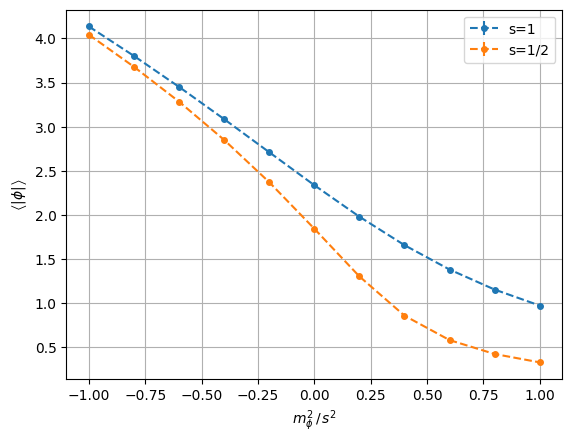

In [17]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        val, err = s.compute_mag(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        val, err = s.compute_mag(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/2")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$\left\langle |\phi| \right\rangle$")

# Condensate

Text(0, 0.5, '$\\left\\langle |\\phi| \\right\\rangle$')

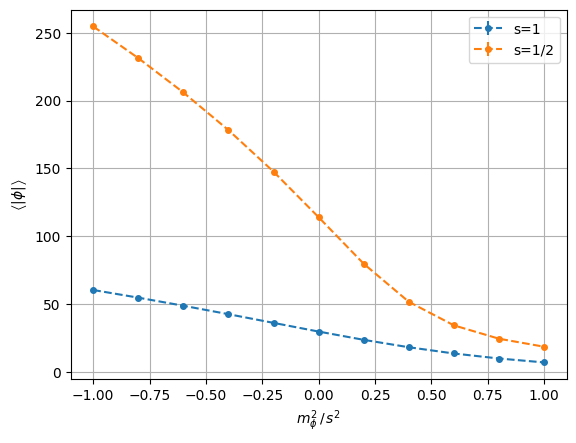

In [18]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        Nx = s.Nx
        val, err = s.compute_condensate(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [Nx*v for v in vals], errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        Nx = s.Nx
        val, err = s.compute_condensate(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], [Nx*v for v in vals], errs, fmt='o--', markersize=4, label="s=1/2")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$\left\langle |\phi| \right\rangle$")

# Susceptibility

Text(0, 0.5, '$\\chi^2 \\, / \\, V$')

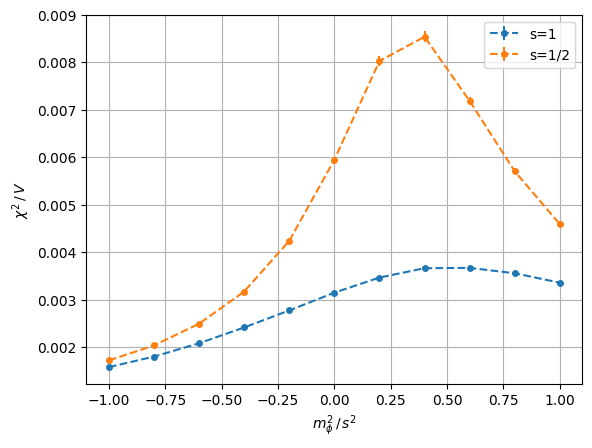

In [10]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        val, err = s.compute_susceptibility(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        val, err = s.compute_susceptibility(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], vals, errs, fmt='o--', markersize=4, label="s=1/2")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$\chi^2 \, / \, V$")

# Renormalised boson mass

In [11]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        Nx = s.Nx
        val, err = s.compute_mphir(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        Nx = s.Nx
        val, err = s.compute_mphir(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], [Nx*v for v in vals], [Nx*e for e in errs], fmt='o--', markersize=4, label="s=1/2")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$ N_x \, m_{\phi, r} $");

ValueError: operands could not be broadcast together with shapes (16,) (32,) 

# Physical quark mass

In [12]:
param = ("physics", "mass")

# s = 1.0
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 1:
        Nx = s.Nx
        val, err = s.compute_mqphys(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2 for m2 in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1")

# s = 0.5
data = []
for s in simulations:
    if s.toml_params["physics"]["cutFraction"] == 0.5:
        Nx = s.Nx
        val, err = s.compute_mqphys(printing=False)
        data.append((s.toml_params[param[0]][param[1]], val, err))
        params, vals, errs = sort_data(data)
plt.errorbar([m2/0.5/0.5 for m2 in params], [v for v in vals], errs, fmt='o--', markersize=4, label="s=1/2")

plt.legend()
plt.grid()
plt.xlabel(r"$m_\phi^2 \, / \, s^2$")
plt.ylabel(r"$ N_x \, m_{\phi, r} $");

AttributeError: 'Dataset' object has no attribute 'Sq_t'